<a href="https://colab.research.google.com/github/ahmedyasser7/DEPI_GP/blob/main/XGBoost_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving accident cleaned data.csv to accident cleaned data.csv


# Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt



#Load the Dataset


In [ ]:
data = pd.read_csv('accident cleaned data.csv')
data

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
0,200901BS70001,-0.201349,51.512273,2,2,1,2009-01-01,5,15:11:00,12,E09000020,30,1,1,1,0,1
1,200901BS70002,-0.199248,51.514399,2,2,11,2009-01-05,2,10:59:00,12,E09000020,30,1,1,2,0,1
2,200901BS70003,-0.179599,51.486668,3,2,1,2009-01-04,1,14:19:00,12,E09000020,30,1,1,1,0,1
3,200901BS70004,-0.203110,51.507804,2,2,1,2009-01-05,2,08:10:00,12,E09000020,30,1,8,4,0,1
4,200901BS70005,-0.173445,51.482076,2,2,1,2009-01-06,3,17:25:00,12,E09000020,30,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898550,2014984136414,-3.417278,55.264773,2,2,1,2014-12-07,1,22:20:00,917,S12000006,70,6,3,3,0,2
898551,2014984137514,-3.230255,55.054855,3,2,2,2014-12-11,5,06:40:00,917,S12000006,70,6,1,3,0,2
898552,2014984137714,-3.230826,54.985668,3,1,1,2014-12-09,3,02:00:00,917,S12000006,40,4,1,4,0,2
898553,2014984138414,-3.191397,54.990446,2,3,2,2014-12-17,4,06:55:00,917,S12000006,60,6,2,2,0,2


#Data Dreprocessing

In [ ]:
data.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
0,200901BS70001,-0.201349,51.512273,2,2,1,2009-01-01,5,15:11:00,12,E09000020,30,1,1,1,0,1
1,200901BS70002,-0.199248,51.514399,2,2,11,2009-01-05,2,10:59:00,12,E09000020,30,1,1,2,0,1
2,200901BS70003,-0.179599,51.486668,3,2,1,2009-01-04,1,14:19:00,12,E09000020,30,1,1,1,0,1
3,200901BS70004,-0.203110,51.507804,2,2,1,2009-01-05,2,08:10:00,12,E09000020,30,1,8,4,0,1
4,200901BS70005,-0.173445,51.482076,2,2,1,2009-01-06,3,17:25:00,12,E09000020,30,4,1,1,0,1


In [ ]:
data.tail()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
898550,2014984136414,-3.417278,55.264773,2,2,1,2014-12-07,1,22:20:00,917,S12000006,70,6,3,3,0,2
898551,2014984137514,-3.230255,55.054855,3,2,2,2014-12-11,5,06:40:00,917,S12000006,70,6,1,3,0,2
898552,2014984137714,-3.230826,54.985668,3,1,1,2014-12-09,3,02:00:00,917,S12000006,40,4,1,4,0,2
898553,2014984138414,-3.191397,54.990446,2,3,2,2014-12-17,4,06:55:00,917,S12000006,60,6,2,2,0,2
898554,2014984139614,-3.348426,55.106700,3,2,2,2014-12-24,4,15:00:00,917,S12000006,60,1,1,2,0,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898555 entries, 0 to 898554
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              898555 non-null  object 
 1   Longitude                   898555 non-null  float64
 2   Latitude                    898555 non-null  float64
 3   Accident_Severity           898555 non-null  int64  
 4   Number_of_Vehicles          898555 non-null  int64  
 5   Number_of_Casualties        898555 non-null  int64  
 6   Date                        898555 non-null  object 
 7   Day_of_Week                 898555 non-null  int64  
 8   Time                        898555 non-null  object 
 9   Local_Authority_(District)  898555 non-null  int64  
 10  Local_Authority_(Highway)   898555 non-null  object 
 11  Speed_limit                 898555 non-null  int64  
 12  Light_Conditions            898555 non-null  int64  
 13  Weather_Condit

In [ ]:
data.describe(include='all')

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
count,898555,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000,898555,898555.000000,898555,898555.000000,898555,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000
unique,898555,NaN,NaN,NaN,NaN,NaN,2191,NaN,1439,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN
top,200901BS70001,NaN,NaN,NaN,NaN,NaN,2010-10-01,NaN,17:00:00,NaN,E10000016,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,698,NaN,8889,NaN,25989,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.393471,52.557925,2.838157,1.826297,1.343093,NaN,4.115010,NaN,350.141962,NaN,38.631375,1.936235,1.551820,1.372541,0.104764,1.349956
std,NaN,1.402066,1.451622,0.398710,0.710371,0.827161,NaN,1.919744,NaN,260.007326,NaN,13.959299,1.641881,1.598791,0.649301,0.714385,0.476956
min,NaN,-7.516225,49.912941,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,10.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,-2.312257,51.483382,3.000000,1.000000,1.000000,NaN,2.000000,NaN,112.000000,NaN,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,NaN,-1.335049,52.211135,3.000000,2.000000,1.000000,NaN,4.000000,NaN,325.000000,NaN,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,NaN,-0.197891,53.453312,3.000000,2.000000,1.000000,NaN,6.000000,NaN,530.000000,NaN,50.000000,4.000000,1.000000,2.000000,0.000000,2.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Accident_Index,0
Longitude,0
Latitude,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0
Time,0
Local_Authority_(District),0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date to datetime

#Feature Selection and Scaling

In [ ]:
# ## Feature Selection
# Selecting relevant features and target variable
features = data[['Number_of_Vehicles', 'Speed_limit', 'Light_Conditions',
                  'Weather_Conditions', 'Road_Surface_Conditions']].copy()  # Use copy to avoid SettingWithCopyWarning
target = data['Number_of_Casualties']


In [ ]:
# ## Feature Scaling
# Scaling the numerical features
scaler = StandardScaler()
numerical_features = ['Number_of_Vehicles', 'Speed_limit',
                     'Light_Conditions', 'Weather_Conditions',
                     'Road_Surface_Conditions']
features.loc[:, numerical_features] = scaler.fit_transform(features[numerical_features])  # Use .loc for assignment


<ipython-input-17-3855e29224c7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.24452509  0.24452509  0.24452509 ... -1.16319165  1.65224183
  0.24452509]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[:, numerical_features] = scaler.fit_transform(features[numerical_features])  # Use .loc for assignment
<ipython-input-17-3855e29224c7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.61832471 -0.61832471 -0.61832471 ...  0.09804403  1.53078151
  1.53078151]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[:, numerical_features] = scaler.fit_transform(features[numerical_features])  # Use .loc for assignment
<ipython-input-17-3855e29224c7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a fu

#Train/Test Split

In [ ]:
# ## Train/Test Split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ## Log Transformation
# Applying log transformation to the target variable to handle skewness
y_train = np.log1p(y_train)  # Log transformation
y_test = np.log1p(y_test)


#Model Definition and Hyperparameter Tuning

In [ ]:
# ## Define the XGBoost Model
# Initializing the XGBoost regressor with specified hyperparameters
xgb_model = XGBRegressor(
    subsample=0.8,
    n_estimators=100,
    min_child_weight=3,
    max_depth=6,
    learning_rate=0.05,
    colsample_bytree=1.0
)



#Model Evaluation

In [ ]:
# ## Model Training
# Fitting the model to the training data
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# ## Model Evaluation
# Making predictions on the test set
y_pred = xgb_model.predict(X_test)


In [ ]:
# ## Inverse Transformation
# Inverse the log transformation to get the original scale of predictions
y_pred_inverse = np.expm1(y_pred)  # Inverse of log1p
y_test_inverse = np.expm1(y_test)  # Inverse of log1p


In [ ]:
# ## Cast Predictions to Integers
# Rounding predictions and converting to integers
y_pred_inverse_int = np.round(y_pred_inverse).astype(int)
y_test_inverse_int = np.round(y_test_inverse).astype(int)


In [ ]:
# ## Calculate RMSE
# Calculating the mean squared error and root mean squared error
mse = mean_squared_error(y_test_inverse_int, y_pred_inverse_int)
rmse = np.sqrt(mse)

# Output the results
print(f"XGBoost Regression - Best Params: {{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}}")
print(f"RMSE: {rmse:.4f}\n")


XGBoost Regression - Best Params: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
RMSE: 0.8861



#Confusion Matrix and Classification Report


In [ ]:
# ## Bin Predictions for Confusion Matrix
# Defining bins for the predictions
bins = [0, 1, 5, 10, 20, np.inf]  # Define your bins
labels = [0, 1, 2, 3]  # Corresponding labels for the bins
y_test_binned = np.digitize(y_test_inverse_int, bins) - 1  # Binned true values
y_pred_binned = np.digitize(y_pred_inverse_int, bins) - 1  # Binned predicted values



In [ ]:
# ## Create Confusion Matrix
# Generating the confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)


In [ ]:
# ## Classification Report
# Printing the classification report
print(classification_report(y_test_binned, y_pred_binned, target_names=[f'{l}-{bins[i+1]}' for i, l in enumerate(labels)]))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0-1       0.99      1.00      0.99    177916
         1-5       0.25      0.00      0.00      1726
        2-10       0.00      0.00      0.00        59
        3-20       0.00      0.00      0.00        10

    accuracy                           0.99    179711
   macro avg       0.31      0.25      0.25    179711
weighted avg       0.98      0.99      0.99    179711



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


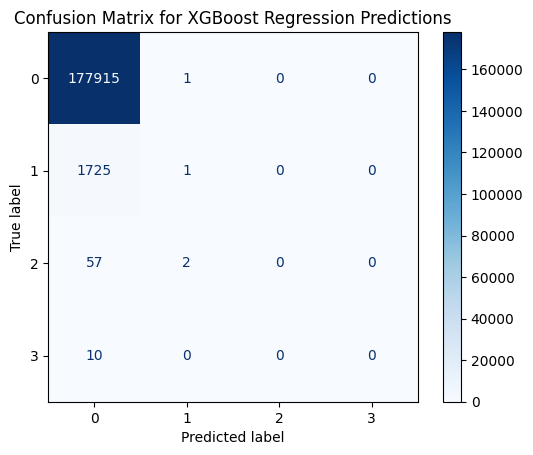

In [ ]:
# ## Display Confusion Matrix
# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Regression Predictions')
plt.show()


#Save Model

In [ ]:
# ## Save the Model
import pickle

# Save the trained model to a file
model_filename = 'xgb_model.pkl'  # Specify your filename here
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"Model saved as {model_filename}")


Model saved as xgb_model.pkl


In [ ]:
import pickle
import numpy as np

# Load the saved model
model_filename = 'xgb_model.pkl'  # Specify your filename here
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Get user inputs
print("Please enter the following inputs:")
number_of_vehicles = float(input("Number of Vehicles: "))
speed_limit = float(input("Speed Limit: "))
light_conditions = float(input("Light Conditions (numeric value): "))
weather_conditions = float(input("Weather Conditions (numeric value): "))
road_surface_conditions = float(input("Road Surface Conditions (numeric value): "))

# Create a feature array for the prediction
features = np.array([[number_of_vehicles, speed_limit, light_conditions, weather_conditions, road_surface_conditions]])

# Predict using the loaded model
predicted_log_casualties = loaded_model.predict(features)

# Inverse transform the log transformation
predicted_casualties = np.expm1(predicted_log_casualties)

# Cast prediction to integer
predicted_casualties_int = int(np.round(predicted_casualties[0]))

# Print the result
print(f"Predicted Number of Casualties: {predicted_casualties_int}")


Please enter the following inputs:
Number of Vehicles: 4
Speed Limit: 50
Light Conditions (numeric value): 3
Weather Conditions (numeric value): 4
Road Surface Conditions (numeric value): 2
Predicted Number of Casualties: 2
